# dataset
https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaushiksuresh147/customer-segmentation")

print("Path to dataset files:", path)

100%|██████████| 99.9k/99.9k [00:00<00:00, 40.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kaushiksuresh147/customer-segmentation/versions/31


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(path+'/Train.csv')

In [8]:
df1 = pd.read_csv(path+'/Test.csv')

In [9]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [10]:
df.drop('ID',axis=1,inplace=True)
df1.drop('ID',axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   object 
 1   Ever_Married     2577 non-null   object 
 2   Age              2627 non-null   int64  
 3   Graduated        2603 non-null   object 
 4   Profession       2589 non-null   object 
 5   Work_Experience  2358 non-null   float64
 6   Spending_Score   2627 non-null   object 
 7   Family_Size      2514 non-null   float64
 8   Var_1            2595 non-null   object 
 9   Segmentation     2627 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 205.4+ KB


In [13]:
df.shape

(8068, 10)

In [14]:
df1.shape

(2627, 10)

In [15]:
df.isnull().sum().sort_values(ascending=False)

,0
Work_Experience,829
Family_Size,335
Ever_Married,140
Profession,124
Graduated,78
Var_1,76
Gender,0
Age,0
Spending_Score,0
Segmentation,0


In [16]:
df1.isnull().sum().sort_values(ascending=False)

,0
Work_Experience,269
Family_Size,113
Ever_Married,50
Profession,38
Var_1,32
Graduated,24
Gender,0
Age,0
Spending_Score,0
Segmentation,0


In [17]:
df1.dropna(inplace=True)

In [18]:
cols_null = df.isnull().sum().sort_values(ascending=False).index[1:6]
cols_null

Index(['Family_Size', 'Ever_Married', 'Profession', 'Graduated', 'Var_1'], dtype='object')

In [ ]:
df.dropna(subset=cols_null,inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Work_Experience,711
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Spending_Score,0
Family_Size,0
Var_1,0
Segmentation,0


In [ ]:
df_Work_Experience = df[~df['Work_Experience'].isna()]

In [ ]:
df_Work_Experience.shape

(6665, 10)

In [ ]:
df_Work_Experience_NUll = df[df['Work_Experience'].isna()]

In [ ]:
df_Work_Experience_NUll.shape

(711, 10)

In [ ]:
df_Work_Experience.isnull().sum().sort_values(ascending=False)

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0
Segmentation,0


In [ ]:
df_Work_Experience.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6665 non-null   object 
 1   Ever_Married     6665 non-null   object 
 2   Age              6665 non-null   int64  
 3   Graduated        6665 non-null   object 
 4   Profession       6665 non-null   object 
 5   Work_Experience  6665 non-null   float64
 6   Spending_Score   6665 non-null   object 
 7   Family_Size      6665 non-null   float64
 8   Var_1            6665 non-null   object 
 9   Segmentation     6665 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 572.8+ KB


In [ ]:
df_Work_Experience_NUll.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 1 to 8049
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           711 non-null    object 
 1   Ever_Married     711 non-null    object 
 2   Age              711 non-null    int64  
 3   Graduated        711 non-null    object 
 4   Profession       711 non-null    object 
 5   Work_Experience  0 non-null      float64
 6   Spending_Score   711 non-null    object 
 7   Family_Size      711 non-null    float64
 8   Var_1            711 non-null    object 
 9   Segmentation     711 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 61.1+ KB


In [ ]:
df_Work_Experience_NUll.isnull().sum().sort_values(ascending=False)

,0
Work_Experience,711
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Spending_Score,0
Family_Size,0
Var_1,0
Segmentation,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_Work_Experience.columns:
  if df_Work_Experience[i].dtype == 'object':
    df_Work_Experience[i] = le.fit_transform(df_Work_Experience[i])
    df_Work_Experience_NUll[i] = le.transform(df_Work_Experience_NUll[i])
    df1[i] = le.transform(df1[i])

In [ ]:
df_Work_Experience.corr()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
Gender,1.000000,0.114869,0.021269,-0.045263,0.028924,-0.052294,-0.057802,0.058025,0.023131,0.033590
Ever_Married,0.114869,1.000000,0.567729,0.202987,-0.138948,-0.092892,-0.632835,-0.083559,0.090855,-0.206909
Age,0.021269,0.567729,1.000000,0.247250,0.037400,-0.188769,-0.277755,-0.281772,0.171659,-0.231696
Graduated,-0.045263,0.202987,0.247250,1.000000,-0.302366,0.032257,-0.164737,-0.234985,0.127577,-0.172233
Profession,0.028924,-0.138948,0.037400,-0.302366,1.000000,-0.031260,0.229339,0.099981,-0.035650,0.201226
Work_Experience,-0.052294,-0.092892,-0.188769,0.032257,-0.031260,1.000000,0.052204,-0.069123,0.026172,0.006982
Spending_Score,-0.057802,-0.632835,-0.277755,-0.164737,0.229339,0.052204,1.000000,-0.113809,-0.045211,0.084895
Family_Size,0.058025,-0.083559,-0.281772,-0.234985,0.099981,-0.069123,-0.113809,1.000000,-0.142051,0.199412
Var_1,0.023131,0.090855,0.171659,0.127577,-0.035650,0.026172,-0.045211,-0.142051,1.000000,-0.019768
Segmentation,0.033590,-0.206909,-0.231696,-0.172233,0.201226,0.006982,0.084895,0.199412,-0.019768,1.000000


In [ ]:
df_Work_Experience.nunique()

,0
Gender,2
Ever_Married,2
Age,67
Graduated,2
Profession,9
Work_Experience,15
Spending_Score,3
Family_Size,9
Var_1,7
Segmentation,4


In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_Work_Experience.drop(['Work_Experience'],axis = 1),
                                                    df_Work_Experience['Work_Experience'] ,
                                                    test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [ ]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))


0.8870967741935484
0.29932483120780196


In [ ]:
df_Work_Experience_NUll['Work_Experience'] = model.predict(df_Work_Experience_NUll.drop(['Work_Experience'],axis = 1))

In [ ]:
df_Work_Experience_NUll.isnull().sum().sort_values(ascending=False)

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0
Segmentation,0


In [ ]:
df_new =pd.concat([df_Work_Experience,df_Work_Experience_NUll])

In [ ]:
df_new.shape

(7376, 10)

In [ ]:
df_new.isnull().sum().sort_values(ascending=False)

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0
Segmentation,0


In [ ]:
X_train = df_new.drop(['Segmentation'],axis = 1)
y_train = df_new['Segmentation']

In [ ]:
X_test = df1.drop(['Segmentation'],axis = 1)
y_test = df1['Segmentation']

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Dictionary of models
models = {

    'LogisticRegression': LogisticRegression(max_iter = 2000),

    'RandomForestClassifier': RandomForestClassifier(),

    'KNeighborsClassifier' : KNeighborsClassifier(),

    'DecisionTreeClassifier': DecisionTreeClassifier(),

    'GaussianNB'            : GaussianNB(),

    'Support Vector Machine' : SVC()
}

In [ ]:
from tqdm import tqdm
# Fit models, predict and calculate accuracy and F1 score
results = []
models_name = []
for name, model in tqdm(models.items()):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    models_name.append(name)
    results.append([accuracy,precision,recall,f1])

100%|██████████| 6/6 [00:08<00:00,  1.35s/it]


In [ ]:
Model_accuracy = pd.DataFrame(results,index=models_name,columns = ['Accuracy','Precision','Recall','F1 Score'])

In [ ]:
Model_accuracy


,Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.326370,0.324880,0.326370,0.315207
RandomForestClassifier,0.315692,0.326214,0.315692,0.316577
KNeighborsClassifier,0.323584,0.338044,0.323584,0.327688
DecisionTreeClassifier,0.303621,0.319790,0.303621,0.307637
GaussianNB,0.330084,0.333670,0.330084,0.316638
Support Vector Machine,0.365367,0.370160,0.365367,0.361687


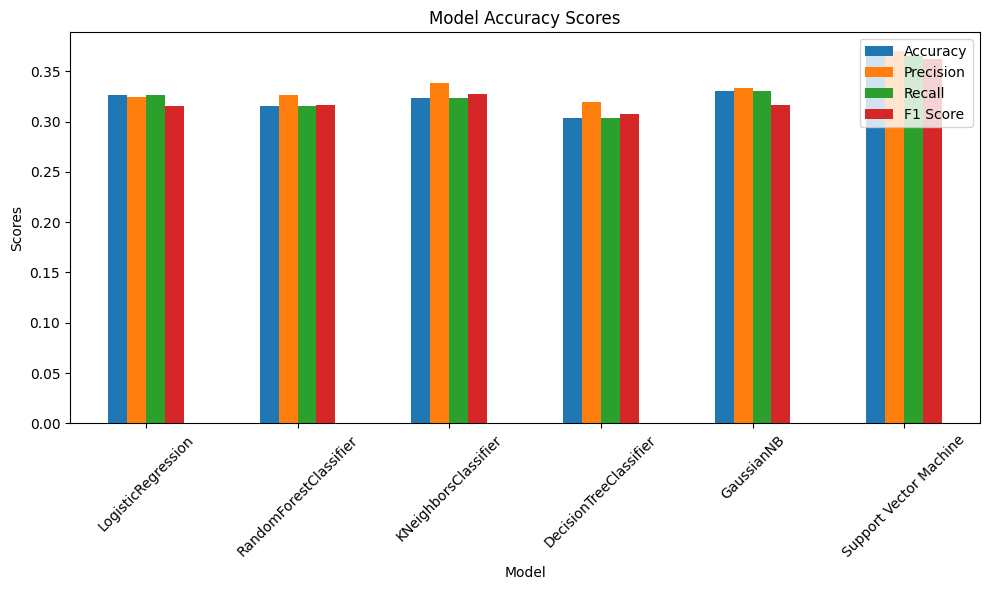

In [ ]:
# Plotting
Model_accuracy.plot(kind='bar', figsize=(10, 6))

# Customizing the plot

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()